In [32]:
import os
import cv2
import numpy as np
import sklearn as sk
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import tensorflow.keras.utils
import imutils
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import io
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [33]:
categories = ["One", "None"]
dataDirectory = "../../../../HandsData/OpenCVHandsData/"

sizeX = 300
sizeY = 500

In [51]:
def resize(image):
    
    h, w, ch = image.shape
    
    zeros = np.zeros((sizeY, sizeX, 3))
    
    tempImage = image.copy()
    
    image = imutils.resize(tempImage, height=sizeY)
    if image.shape[1] > sizeX:
        image = imutils.resize(tempImage, width=sizeX)
    
    zeros[:image.shape[0], :image.shape[1]] = image
    
    #print()
    
    return ones

In [52]:
X = []
y = []

for category in categories:
    
    path = dataDirectory + category
    
    for image in tqdm(os.listdir(path)[::3]):
        
        image = cv2.imread(path + '/' + image)
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image = resize(image)
        
        X.append(image)
        y.append(categories.index(category))
        

100%|███████████████████████████████████████████████████████████████████████████████| 403/403 [00:02<00:00, 173.56it/s]


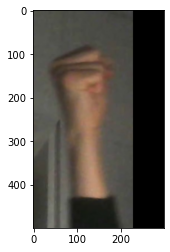

In [56]:
plt.imshow(X[700].astype(np.uint8))
plt.show()

In [39]:
X = np.array(X)

print(X.shape)

X = X.reshape(-1, sizeX, sizeY, 3)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

print(X_train[0][0][:5])

(934,)


C:\Users\benma\anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: cannot reshape array of size 934 into shape (300,500,3)

In [6]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

#print(X_train, y_train)

AttributeError: 'list' object has no attribute 'shape'